In [32]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [33]:
# Ingesting data
data = pd.read_csv('assignment.csv')
data.head()

,Id,Application Date,City,Income,Stage
0,1,30-Sep-18,North West Delhi,307296,Stage 1
1,2,30-Sep-18,North West Delhi,323976,Stage 0
2,3,30-Sep-18,Mumbai,235632,Stage 1
3,4,30-Sep-18,Jaipur,250668,Stage 0
4,5,30-Sep-18,Lakhimpur,533616,Stage 0


## Income Level of Applicant across Cities

Creating a Dataframe grouping applicants by the city names, and thus finding the mean income of applicants in the city segments.

Below is mentioned the plot of **Top 10** cities with highest average income.

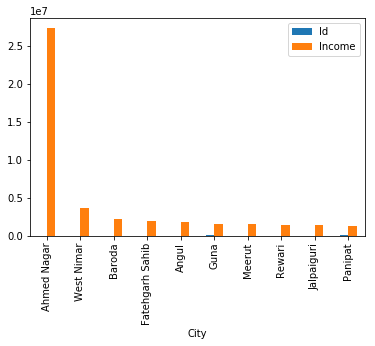

In [34]:
city_data = data.groupby('City').mean()
city_data.sort_values('Income', ascending= False).head(10).plot(kind = 'bar');

No wonder, Ahmed Nagar boasts of the Highes per capita income in the country in GK books

In [35]:
print('The number of cities in entire dataset: ', len(data.City.unique()))
print('The number of cities in only fifth Stage : ', len(data[data.Stage == 'Stage 5'].City.unique()))

The number of cities in entire dataset:  417
The number of cities in only fifth Stage :  4


Only the applicant from 4 cities are able to colclude the final stage. Let us plot the graphs of the cities from where the applicants reached to stage 2 and onwards

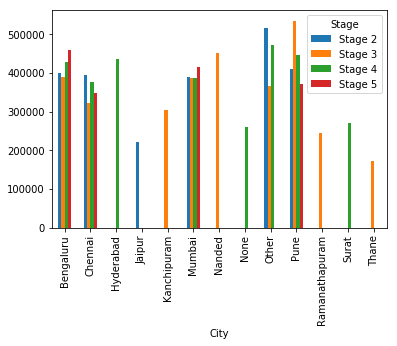

In [36]:
pd.pivot_table(data[(data.Stage != 'Stage 0') & (data.Stage != 'Stage 1')], values= 'Income', index = 'City', columns= 'Stage', aggfunc= 'mean', fill_value= 0).plot(kind = 'bar');

This graph summarizes that the Applicants from Bengaluru, Chennai, Mumbai and Pune are completing all the stages of loan approval

## Overall Conversion Rate from Stage 0 to Stage 5 (for two months)
We need to analyze the dataset on Stage level. 

Let's start with finding the number of applicants on each individual stage.

In [37]:
stage_data = data.groupby('Stage').count().reset_index().loc[:,['Stage', 'Id']]
stage_data

,Stage,Id
0,Stage 0,5244
1,Stage 1,3917
2,Stage 2,353
3,Stage 3,359
4,Stage 4,716
5,Stage 5,89


Adding one column in DataFrame `stage_data` to understand the Conversion

The conversion Rate between any two stages for e.g. stage X and stage Y can be defined as the ratio of the number of the customers who reached stage Y and beyond to the number of the customers who reached stage X and beyond.

We need to find that number in each stage first.
i.e. 
Conversion Number is Stage 3 is applicants in stage 3 plus applicants in stage 4 and applicants in stage 5

In [38]:
# declaring empty list for conversion number and then generating the number based on each stage of dataset
conversion = []
for i in stage_data.Stage.tolist():
    conversion.append(sum(stage_data.Id.tolist()[stage_data.Stage.tolist().index(i):]))

# Creating the columns in DataFrame stage_data
stage_data['Conversion Number'] = pd.Series(conversion)
stage_data

,Stage,Id,Conversion Number
0,Stage 0,5244,10678
1,Stage 1,3917,5434
2,Stage 2,353,1517
3,Stage 3,359,1164
4,Stage 4,716,805
5,Stage 5,89,89


Defining the formula to find out Conversion Rate between two stages

In [39]:
# Function for Conversion Rate
def conversion_rate(stage_x, stage_y, df):
    rate = sum(df[df.Stage == stage_y]['Conversion Number'].values)/sum(df[df.Stage == stage_x]['Conversion Number'].values)
    return rate

#Finding the Conversion rate between Stage 0 and Stage 5
print('Overall conversion rate from Stage 0 to Stage 5 is: ', round(conversion_rate('Stage 0', 'Stage 5', stage_data), 6))

Overall conversion rate from Stage 0 to Stage 5 is:  0.008335


Based on the Analysis I can explain that the overall conversion is **0.008335**

## The Step of the Funnel which is the  Biggest Driver of the changes
Exploring applicant flow Funnel

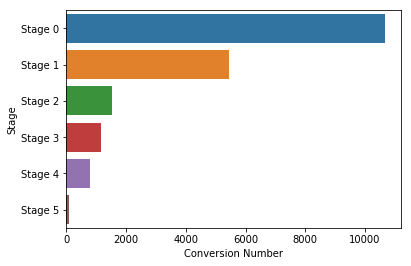

In [40]:
# At first, let's visualize how different the Conversion numbers are each stage
#(based on the suggestion given in Asignment document)
sns.barplot(x = 'Conversion Number', y = 'Stage', data = stage_data);

##### Explaining the Conversion Rate

So Conversion Rate is the the ratio of the number of the customers who reached stage Y and beyond to the number of the customers who reached stage X and beyond.

I am assuming the Stage 0 is the universe here and thus in this stage, Conversion Rate is 1.

We can create another column in DataFrame to understand it more clearly.

In [41]:
# Explaining the conversion rate within the dataframe by digits

stage_data['Conversion Rate'] = pd.Series()

for i in range(6):
    m = 'Stage ' + str(i)
    n = 'Stage ' + str(i-1)
    if i == 0:
        stage_data.loc[i,['Conversion Rate']] = 1
    else:
        stage_data.loc[i,['Conversion Rate']] = round(conversion_rate(n, m, stage_data), 5)

stage_data.to_csv('stages.csv')

Here, Conversion Rate next to Stage 2 is the ration of Conversion Number in Stage 2 vs the Conversion Number in Stage 1. Similarily, Conversion Rate next to Stage 5 is the ration of Conversion Number in Stage 5 vs the Conversion Number in Stage 4

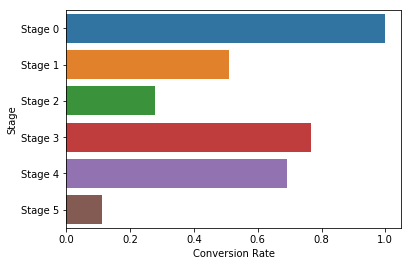

In [42]:
#plotting the Conversion rate funnel
sns.barplot(x = 'Conversion Rate', y = 'Stage', data = stage_data);

From the plot, it is very clear that **the Conversion Number is the least at Stage 5** right befor the Loan approval. Stage 2 is also a bottleneck in this loan process

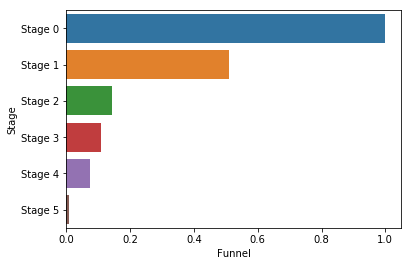

In [43]:
stage_data['Funnel'] = stage_data['Conversion Number']/10678
stage_data.to_csv('stages.csv')
sns.barplot(x = 'Funnel', y = 'Stage', data = stage_data);

In [44]:
stage_data

,Stage,Id,Conversion Number,Conversion Rate,Funnel
0,Stage 0,5244,10678,1.00000,1.000000
1,Stage 1,3917,5434,0.50890,0.508897
2,Stage 2,353,1517,0.27917,0.142068
3,Stage 3,359,1164,0.76730,0.109009
4,Stage 4,716,805,0.69158,0.075389
5,Stage 5,89,89,0.11056,0.008335


## Impact of Cities and Income level on the Conversion Rate

##### Average Income of the Applicants overall vs the applicants Stage 5

In [45]:
# Creating a pivot table of the City vs Columns based on the average income of applicants
pivot_analysis = pd.pivot_table(data, values = 'Income', index = 'City', columns = 'Stage', fill_value= 0, aggfunc= 'mean')
pivot_analysis.head()

Stage,Stage 0,Stage 1,Stage 2,Stage 3,Stage 4,Stage 5
City,,,,,,
Adilabad,332952.000000,2.192960e+05,0.0,0.0,0.0,0.0
Agra,594737.142857,1.315720e+05,0.0,0.0,0.0,0.0
Ahmed Nagar,388100.000000,1.080374e+08,0.0,0.0,0.0,0.0
Ahmedabad,433349.600000,3.635763e+05,0.0,0.0,0.0,0.0
Ajmer,678276.000000,3.061880e+05,0.0,0.0,0.0,0.0


Clearly, the above table does not explain anything. Let's select the Stage 2 and onwards only

In [46]:
pivot_analysis_2345 = pd.pivot_table(data[(data.Stage != 'Stage 0') & (data.Stage != 'Stage 1')], values = 'Income', index = 'City', columns = 'Stage', fill_value= 0, aggfunc= 'mean')
pivot_analysis_2345

Stage,Stage 2,Stage 3,Stage 4,Stage 5
City,,,,
Bengaluru,400613.110048,389008.674419,427833.507692,459207.250000
Chennai,393737.357143,323127.661017,377108.934307,349152.857143
Hyderabad,0.000000,0.000000,436764.000000,0.000000
Jaipur,220356.000000,0.000000,0.000000,0.000000
Kanchipuram,0.000000,305340.000000,0.000000,0.000000
Mumbai,388818.976744,386647.090909,386243.686957,416472.750000
Nanded,0.000000,451968.000000,0.000000,0.000000
None,0.000000,0.000000,260364.000000,0.000000
Other,515082.000000,365277.000000,472986.000000,0.000000


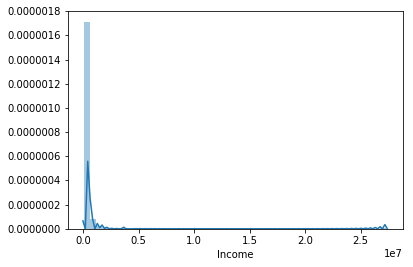

In [47]:
# Let us see the trend of the applicants income
sns.distplot(city_data.Income);

It seems to have the outliers.

For better understanding, we need to remove the outlier.

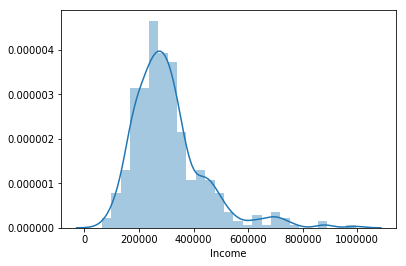

In [48]:
# Trend in applicants' income after removing the outlier
sns.distplot(city_data[city_data.Income <1000000].Income);

We can see that most of the applicants have a income from 200000 (approx) to less than 400000.

Let's see the difference between the average income of applicants vs the average income of the applicants who reached the Stage 5

In [49]:
imp_data = data[data.Income < 1000000]

mean_0 = imp_data[imp_data.Stage == 'Stage 0'].Income.mean()
print('\nAverage income of the Applicants in Stage 0 is: ', int(mean_0))

mean_5 = imp_data[imp_data.Stage == 'Stage 5'].Income.mean()
print('\nAverage income of the Applicants in Stage 5 is: ', int(mean_5))


Average income of the Applicants in Stage 0 is:  294891

Average income of the Applicants in Stage 5 is:  388832


Below two plots explain the user flow vs Average Income. At Stage 0, the income is less but as we move to the coming stages, the average income is more.


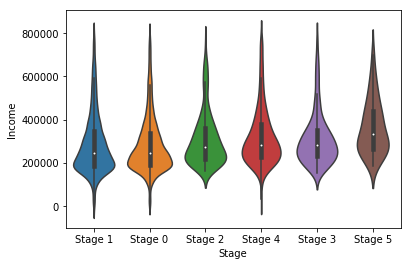

In [50]:
sns.violinplot(x = 'Stage', y = 'Income', data = data[data.Income < 800000]);

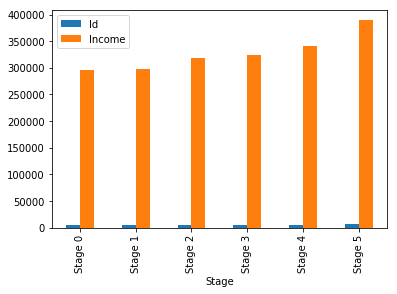

In [51]:
data[data.Income < 1000000].groupby(['Stage']).mean().plot(kind = 'bar');